In [18]:
#import nessecary libraries
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from skimage import io, filters
import matplotlib.pyplot as plt
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from IPython.display import display
import cv2
from skimage.filters import try_all_threshold
from skimage import data
from skimage.filters import threshold_li
from skimage.feature import canny
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.draw import circle_perimeter
import skimage as ski
from skimage.measure import label, regionprops




636 568 RGB JPEG <class 'PIL.JpegImagePlugin.JpegImageFile'>


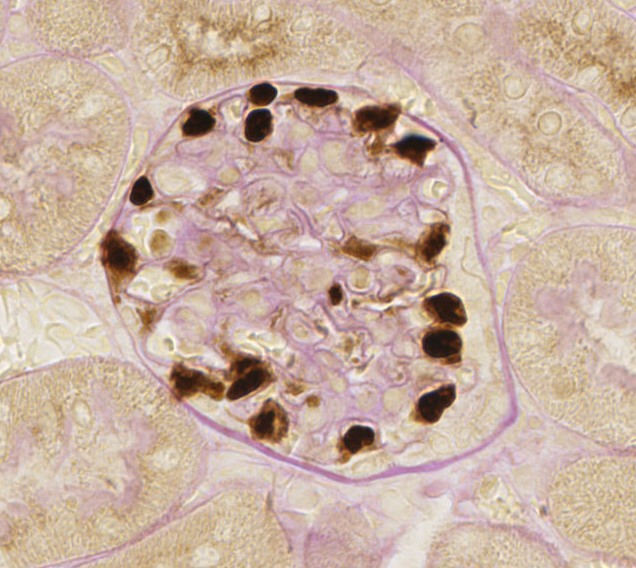

In [19]:
#Read and display the image
im=Image.open("./Images/K6T.jpg") # Read the image
print(im.width, im.height, im.mode, im.format, type(im))
display(im) #display the image  

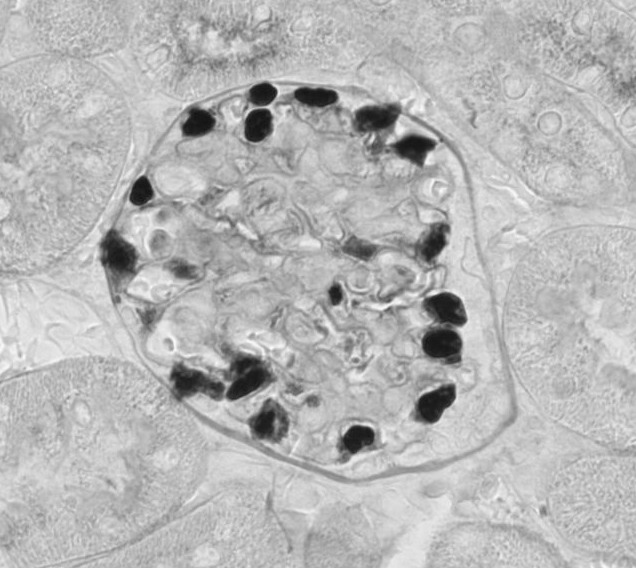

In [20]:
# Produce a gray scale version of the image
im_gray =im.convert('L')  # convert the RGB color to grayscale
im_gray.save("./Images/K6T_gray.png")  # save the image
display(Image.open("./Images/K6T_gray.png"))  # display the gray scale image

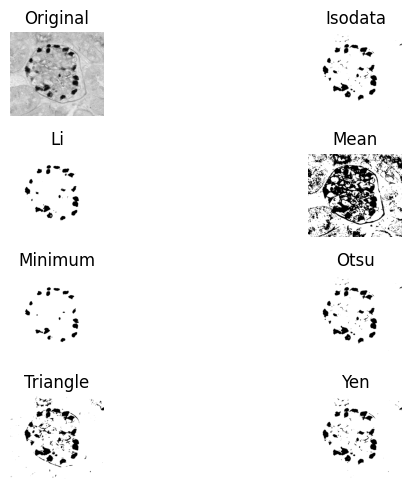

In [21]:
# try all threshholding methods to see which one works better
im_gray = np.array(im_gray)
im_gray= filters.gaussian(im_gray, sigma=1)
fig, ax= try_all_threshold(im_gray, verbose=False)
plt.show()

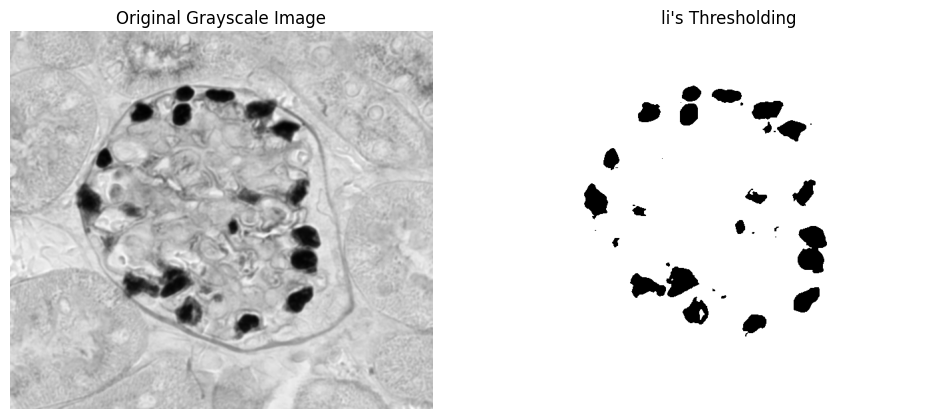

In [22]:
#thresholding with Otsu
# Ensure the image is a NumPy array
im_gray = np.array(im_gray)

# Apply Otsu's thresholding
li_thresh = threshold_li(im_gray)
binary_image = im_gray > li_thresh

# Display the original and thresholded images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(im_gray, cmap='gray')
ax[0].set_title('Original Grayscale Image')
ax[0].axis('off')

ax[1].imshow(binary_image, cmap='gray')
ax[1].set_title("li's Thresholding")
ax[1].axis('off')

plt.show()
io.imsave('./Images/K6T_threshold.png', binary_image.astype(np.uint8) * 255)  # Convert binary image to uint8 format


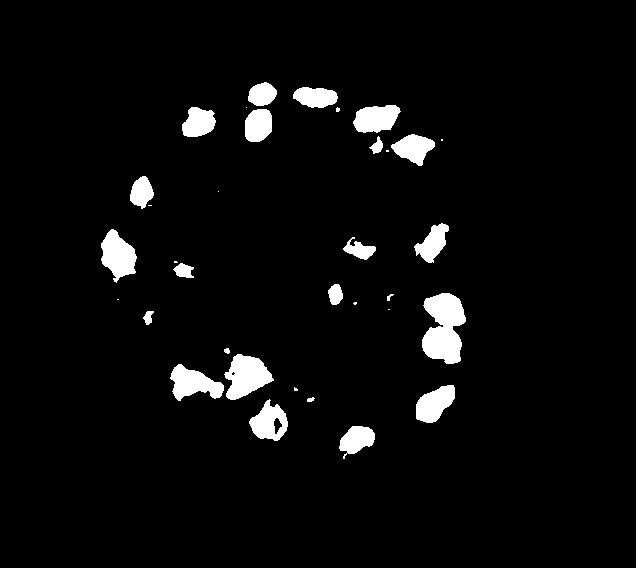

Region areas before filtering:
Label: 1, Area: 515.0
Label: 2, Area: 711.0
Label: 3, Area: 1000.0
Label: 4, Area: 759.0
Label: 5, Area: 1.0
Label: 6, Area: 16.0
Label: 7, Area: 755.0
Label: 8, Area: 830.0
Label: 9, Area: 128.0
Label: 10, Area: 4.0
Label: 11, Area: 6.0
Label: 12, Area: 530.0
Label: 13, Area: 1.0
Label: 14, Area: 4.0
Label: 15, Area: 739.0
Label: 16, Area: 1197.0
Label: 17, Area: 375.0
Label: 18, Area: 7.0
Label: 19, Area: 209.0
Label: 20, Area: 235.0
Label: 21, Area: 2205.0
Label: 22, Area: 24.0
Label: 23, Area: 2.0
Label: 24, Area: 9.0
Label: 25, Area: 2.0
Label: 26, Area: 95.0
Label: 27, Area: 27.0
Label: 28, Area: 1417.0
Label: 29, Area: 1136.0
Label: 30, Area: 981.0
Label: 31, Area: 12.0
Label: 32, Area: 28.0
Label: 33, Area: 960.0
Label: 34, Area: 728.0
Region areas after filtering:
Label: 1, Area: 515.0
Label: 2, Area: 711.0
Label: 3, Area: 1000.0
Label: 4, Area: 759.0
Label: 7, Area: 755.0
Label: 8, Area: 830.0
Label: 12, Area: 530.0
Label: 15, Area: 739.0
Label:

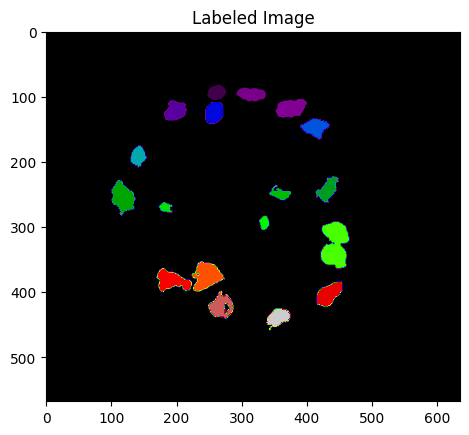

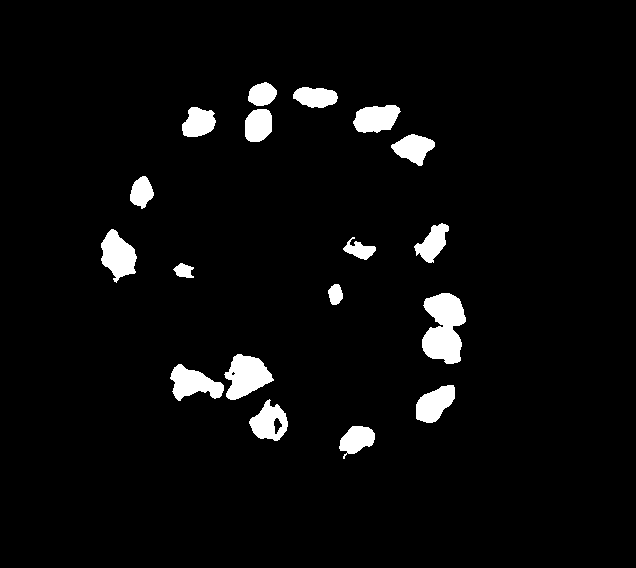

The number of podocytes in this image is: 18


In [23]:
#filter small areas and count the number of podocytes
im_thresh= Image.open("./Images/K6T_threshold.png")   # read the thresholded image
im_thresh= np.array(im_thresh)                  #read it as a numpy array
im_thresh_inv= ski.util.invert(im_thresh)          #invert the image
im_thresh_inv= Image.fromarray(im_thresh_inv)      #get the image from array
display(im_thresh_inv)                               #display the image
im_thresh_inv = np.array(im_thresh_inv)              #convert to array again
label_image = label(im_thresh_inv)                 # label the regions
print("Region areas before filtering:")                      #print areas of the regions for debugging purposes
for region in regionprops(label_image):
    print(f"Label: {region.label}, Area: {region.area}")
for region in regionprops(label_image):                          #label the areas
    if region.area < 200:
        for coordinates in region.coords:
            label_image[coordinates[0], coordinates[1]] = 0
im_thresh_inv_arr = label_image > 0
print("Region areas after filtering:")
Podocount = 0
for region in regionprops(label_image):
    Podocount +=1                                  #Count Podocytes
    print(f"Label: {region.label}, Area: {region.area}")        #print regions for debugging purposes

# check if it is labeling correctly  for debugging purposes
plt.imshow(label_image, cmap='nipy_spectral')
plt.title('Labeled Image')

plt.show()
cleanIm = Image.fromarray(im_thresh_inv_arr)
display(cleanIm)
print("The number of podocytes in this image is:", Podocount)


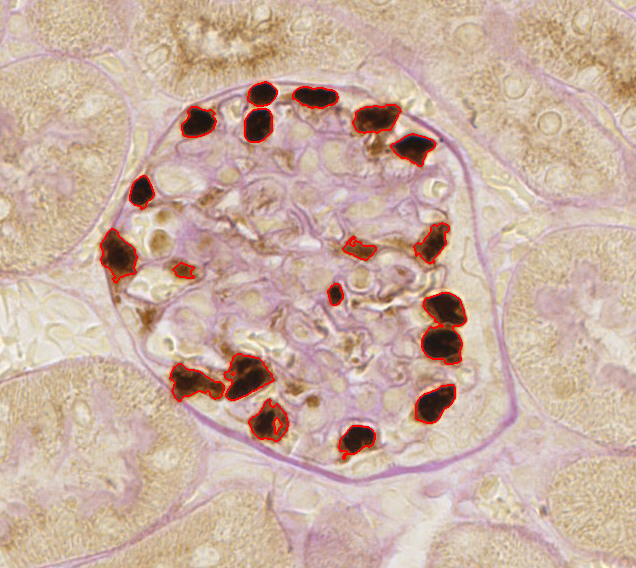

In [24]:
#produce an overlay image
import scipy.ndimage as ndi
selem = ski.morphology.disk(1)
regions = np.unique(cleanIm)
color = [255,0,0]  # red color
#Annotate the original image
for region in regions:
    if region == 0:
        continue   #skip the background
    region_mask = (ndi.minimum_filter(cleanIm, footprint=selem) == 0) & (ndi.maximum_filter(cleanIm, footprint=selem) == region)
    im = np.array(im)
    im[region_mask] = color
im_overlay = Image.fromarray(im)
display(im_overlay)

In [25]:
#Notes

#Use Moprhological operations maybe erosion to make it more efficient
#Maybe use color deconvolution for the three circles inside
